# 消费者人群画像—信用智能评分

### 读取数据

In [1]:
# 首先 import 必要的模块
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#打开文件
# path to where the data lies
dpath = './input/'
train = pd.read_csv(dpath +'train_dataset.csv',index_col='用户编码')
test = pd.read_csv(dpath + 'test_dataset.csv',index_col='用户编码')
train['data_type'] = 0
test['data_type'] = 1

In [3]:
score=train['信用分']
train=train.drop(["信用分"],axis=1)
data=pd.concat((train,test),axis=0)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, a4651f98c82948b186bdcdc8108381b4 to e9b5e148e5cc4993bd990cbf15a9c0e6
Data columns (total 29 columns):
用户实名制是否通过核实        100000 non-null int64
用户年龄               100000 non-null int64
是否大学生客户            100000 non-null int64
是否黑名单客户            100000 non-null int64
是否4G不健康客户          100000 non-null int64
用户网龄（月）            100000 non-null int64
用户最近一次缴费距今时长（月）    100000 non-null int64
缴费用户最近一次缴费金额（元）    100000 non-null float64
用户近6个月平均消费值（元）     100000 non-null float64
用户账单当月总费用（元）       100000 non-null float64
用户当月账户余额（元）        100000 non-null int64
缴费用户当前是否欠费缴费       100000 non-null int64
用户话费敏感度            100000 non-null int64
当月通话交往圈人数          100000 non-null int64
是否经常逛商场的人          100000 non-null int64
近三个月月均商场出现次数       100000 non-null int64
当月是否逛过福州仓山万达       100000 non-null int64
当月是否到过福州山姆会员店      100000 non-null int64
当月是否看电影            100000 non-null int64
当月是否景点游览           100000 non-null int64
当月是否体育场馆消费 

### 创造特征

In [4]:
diff_feature_list = ['用户网龄（月）','用户最近一次缴费距今时长（月）','缴费用户最近一次缴费金额（元）',
                     '用户近6个月平均消费值（元）','用户账单当月总费用（元）','用户当月账户余额（元）'
                    ]

data['diff_用户近6个月平均消费值（元）_缴费用户最近一次缴费金额（元）'] = data['用户近6个月平均消费值（元）'] - data['缴费用户最近一次缴费金额（元）']
data['diff_用户近6个月平均消费值（元）_用户账单当月总费用（元）'] = data['用户近6个月平均消费值（元）']- data['用户账单当月总费用（元）']
data['diff_用户近6个月平均消费值（元）_用户当月账户余额（元）'] = data['用户近6个月平均消费值（元）'] - data['用户当月账户余额（元）']
data['diff_用户账单当月总费用（元）_用户当月账户余额（元）'] = data['用户账单当月总费用（元）'] - data['用户当月账户余额（元）']
data['diff_用户账单当月总费用（元）_缴费用户最近一次缴费金额（元）'] = data['用户账单当月总费用（元）'] - data['缴费用户最近一次缴费金额（元）']
    
data['ratio_用户近6个月平均消费值（元）/缴费用户最近一次缴费金额（元）'] = data['用户近6个月平均消费值（元）'] /(data['缴费用户最近一次缴费金额（元）']+1)
data['ratio_用户近6个月平均消费值（元）/用户账单当月总费用（元）'] = data['用户近6个月平均消费值（元）']/( data['用户账单当月总费用（元）']+1)
data['ratio_用户近6个月平均消费值（元）/用户当月账户余额（元）'] = data['用户近6个月平均消费值（元）'] /( data['用户当月账户余额（元）']+1)
data['ratio_用户账单当月总费用（元）/用户当月账户余额（元）'] = data['用户账单当月总费用（元）'] /(data['用户当月账户余额（元）']+1)
data['ratio_用户账单当月总费用（元）/缴费用户最近一次缴费金额（元）'] = data['用户账单当月总费用（元）'] /( data['缴费用户最近一次缴费金额（元）']+1)

### 可视化

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017AA88A35C0>]],
      dtype=object)

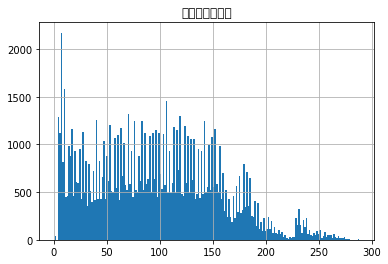

In [5]:
data.hist(column="用户网龄（月）",bins=200)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017AA8FE5EF0>]],
      dtype=object)

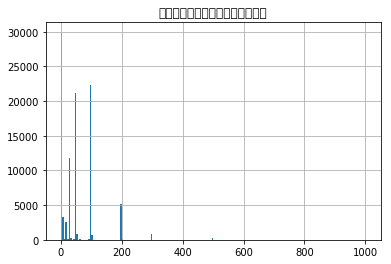

In [6]:
data.hist(column="缴费用户最近一次缴费金额（元）",bins=200)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017AA9C855F8>]],
      dtype=object)

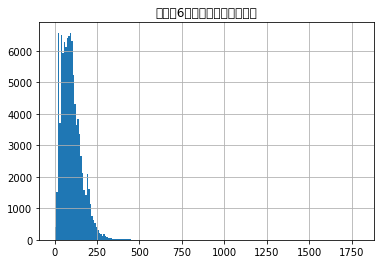

In [7]:
data.hist(column="用户近6个月平均消费值（元）",bins=200)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017AA9F03E10>]],
      dtype=object)

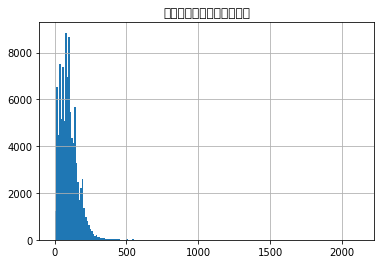

In [8]:
data.hist(column="用户账单当月总费用（元）",bins=200)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017AA9F61E48>]],
      dtype=object)

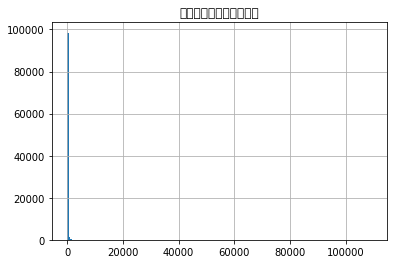

In [9]:
data.hist(column="用户当月账户余额（元）",bins=200)

### 处理长尾分布

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002391D752A90>]],
      dtype=object)

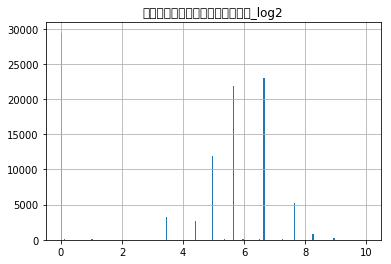

In [5]:
#对'缴费用户最近一次缴费金额（元）'进行log2处理
data['缴费用户最近一次缴费金额（元）'] = np.log2(data['缴费用户最近一次缴费金额（元）']+1)
data.rename(columns={'缴费用户最近一次缴费金额（元）':'缴费用户最近一次缴费金额（元）_log2'},inplace = True)
data.hist(column="缴费用户最近一次缴费金额（元）_log2",bins=200)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002391BED71D0>]],
      dtype=object)

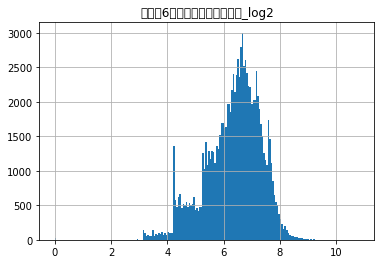

In [6]:
#对'用户近6个月平均消费值（元）'进行log2处理
data['用户近6个月平均消费值（元）'] = np.log2(data['用户近6个月平均消费值（元）']+1)
data.rename(columns={'用户近6个月平均消费值（元）':'用户近6个月平均消费值（元）_log2'},inplace = True)
data.hist(column="用户近6个月平均消费值（元）_log2",bins=200)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002391EB255C0>]],
      dtype=object)

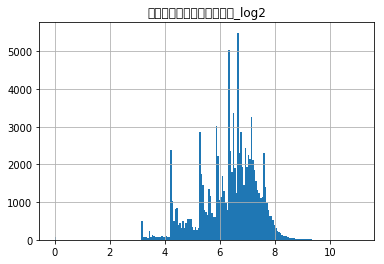

In [7]:
#对'用户账单当月总费用（元）'进行log2处理
data['用户账单当月总费用（元）'] = np.log2(data['用户账单当月总费用（元）']+1)
data.rename(columns={'用户账单当月总费用（元）':'用户账单当月总费用（元）_log2'},inplace = True)
data.hist(column="用户账单当月总费用（元）_log2",bins=200)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002391ED64EF0>]],
      dtype=object)

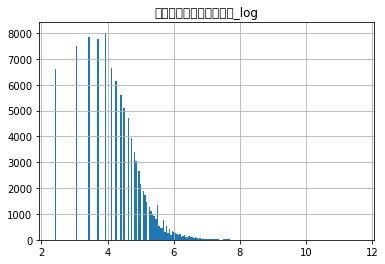

In [8]:
#对'用户当月账户余额（元）'进行loglp处理
data['用户当月账户余额（元）'] = np.log1p(data['用户当月账户余额（元）'])
data.rename(columns={'用户当月账户余额（元）':'用户当月账户余额（元）_log'},inplace = True)
data.hist(column="用户当月账户余额（元）_log",bins=200)

### 处理分类数据

In [9]:
data=pd.get_dummies(data,columns=['用户话费敏感度'],prefix='用户话费敏感度')

### 数据标准化

In [10]:
data_columns=data.columns
data_index=data.index

In [11]:
from sklearn.preprocessing import MinMaxScaler# 对数据缩放
# 构造输入特征的标准化器
MS = MinMaxScaler()
data_Scaler = MS.fit_transform(data)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
data=pd.DataFrame(data_Scaler,columns=data_columns,index=data_index)

### 分割数据集

In [13]:
train_data = data[(data.data_type == 0)]
test_data = data[(data.data_type == 1)]

In [14]:
train_data=pd.concat([train_data,score],axis=1)

In [15]:
train_data.to_csv(dpath +'train_data_org.csv',index=True)
test_data.to_csv(dpath +'test_data_org.csv',index=True)